# ENCODER DECODER ARCHITECTURE 

## History

Machine Translation is utilizing the power of machines to do “automatic translation of text from one natural language (the source language) to another (the target language). The idea of doing translation using machines was first raised by Warren Weaver in 1949. The traditional approach for machine translation was to use statistical methods such as phrase-based machine translation or rule-based machine translation. These methods were limited by the need for large amounts of parallel training data and complex hand-engineered rules. In 2014, Sutskever et al. and Cho et al. developed a method called sequence to sequence (seq2seq) learning using RNN for both encoder and decoder, and introduced the Long Short-Term Memory for Machine Translation. The Model was applied for english to french translation for the first time and became so popular that it's the core of Google's Translation System.

Here's a link to there paper: https://arxiv.org/pdf/1409.3215.pdf

## Why Encoder Decoder

LSTM networks have some limitations when it comes to processing sequences where the input and output have different lengths or modalities. This is where the Encoder-Decoder architecture comes in. The Encoder-Decoder architecture is designed specifically to handle these types of tasks by compressing the input sequence into a fixed-length vector representation using the Encoder component and then using the Decoder component to generate the output sequence. This architecture allows the model to handle input and output sequences of different lengths and modalities, making it well-suited for tasks such as machine translation, text summarization, image captioning, speech recognition, and others.

## What is Encoder Decoder

The best way to understand the concept of an encoder-decoder model is by playing Pictionary. The rules of the game are very simple, player 1 randomly picks a word from a list and needs to sketch the meaning in a drawing. The role of the second player in the team is to analyse the drawing and identify the word which it describes.

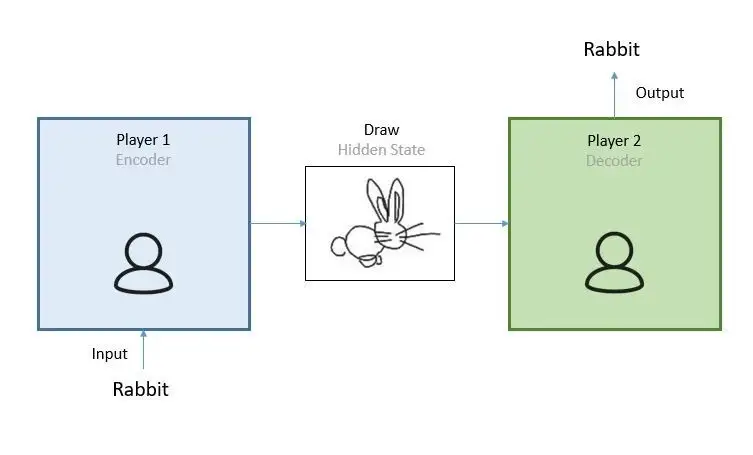

If we translate the above graph into machine learning concepts, we would see the below one.
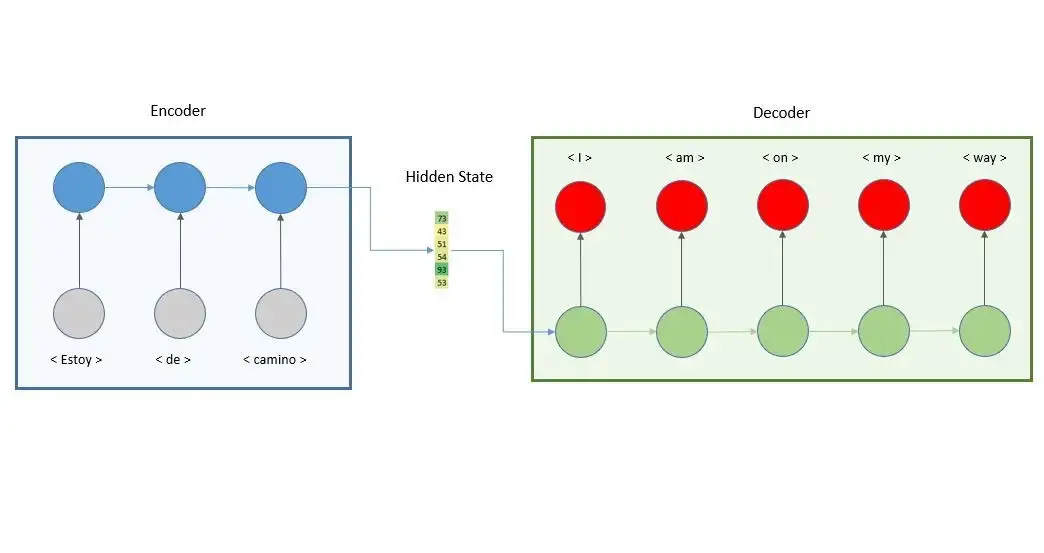

### 1-Encoder (Picturist)
Encoding means to convert data into a required format. In the Pictionary example we convert a word (text) into a drawing (image).
### 2-Hidden State (Sketch)
The output of the encoder, a two-dimensional vector that encapsulates the whole meaning of the input sequence. The length of the vector depends on the number of cells in the RNN.
### 3-Decoder
To decode means to convert a coded message into intelligible language. The second person in the team playing Pictionary will convert the drawing into a word.

## Under the Hood

To understand the working of the encoder decoder architecture let us consider a single english sentence, "Nice to meet you" that is to be translated into Roman urdu, "Apse milkay acha laga."

The internal structure of both the blocks would look something like this:
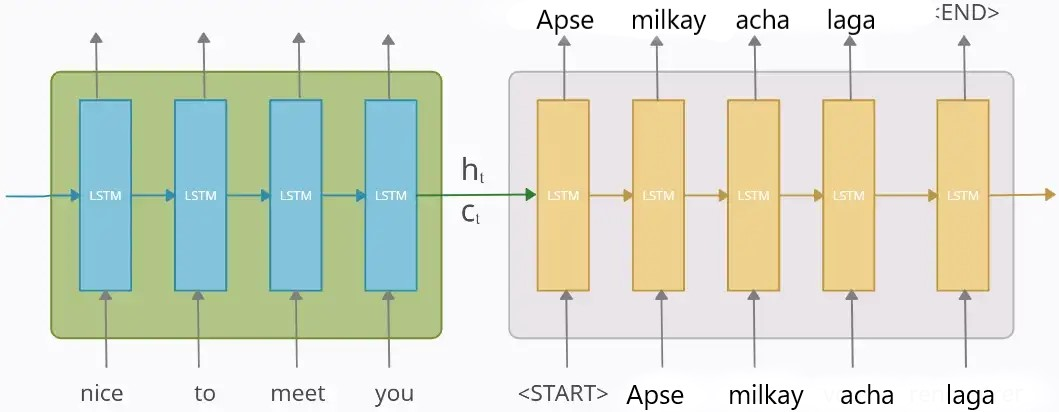

### The Encoder Block

A stack of several recurrent units (LSTM or GRU cells for better performance) where each accepts a single element of the input sequence, collects information for that element and propagates it forward.
A Recurrent Neural Network (RNN), such as an LSTM or GRU, processes the input sequence one word at a time and updates its hidden state h_t based on the current input x_t and the previous hidden state h_{t-1}:
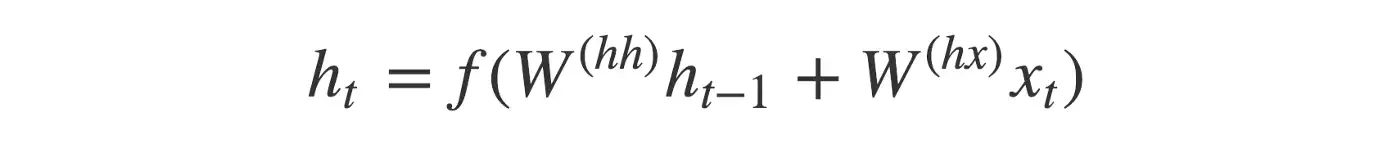


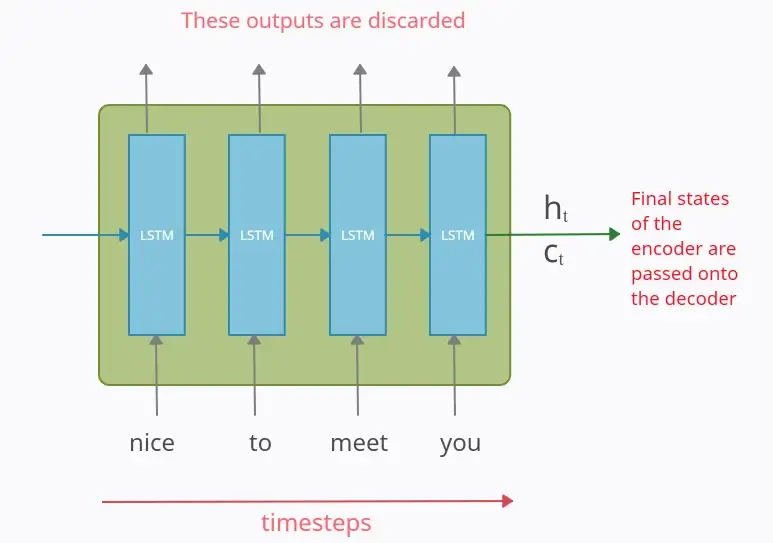

### Context Vector

This is the final hidden state produced from the encoder part of the model. It is calculated using the formula above.
This vector aims to encapsulate the information for all input elements in order to help the decoder make accurate predictions.
It acts as the initial hidden state of the decoder part of the model.
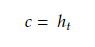

### The Decoder Block

A stack of several recurrent units where each predicts an output y_t at a time step t.
Each recurrent unit accepts a hidden state from the previous unit and produces and output as well as its own hidden state.
Any hidden state h_i is computed using the formula: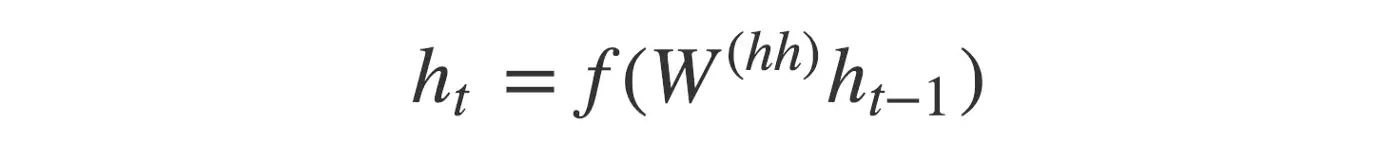
The output y_t at time step t is computed using the formula:


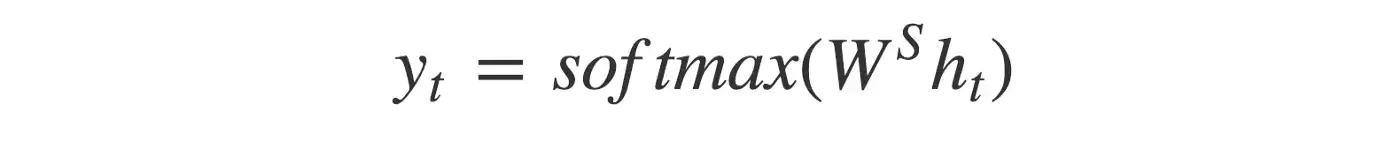

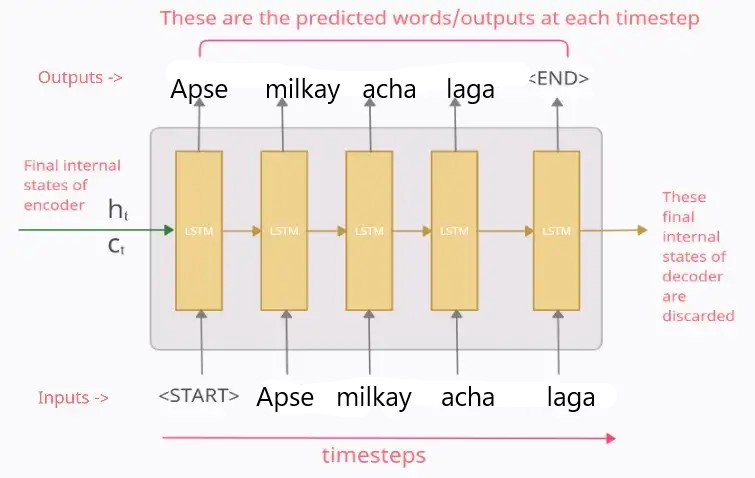

## Training and Testing Phase

The raw data that we have is

X = “nice to meet you” → Y_true = “Apse milkay acha laga”

Now we put the special symbols "START" and "END" at the start and the end of our target-sequence

For input X

‘nice’ → x1 : [1 0 0 0]

‘to’ → x2 : [0 1 0 0 ]

‘meet’ →x3 : [0 0 1 0]

‘you’ → x4 : [0 0 0 1]

For Output Y_true

‘START’ → y0_true : [1 0 0 0 0 0]

‘ravi’ → y1_true : [0 1 0 0 0 0]

‘de’ → y2_true : [0 0 1 0 0 0]

‘vous’ → y3_true : [0 0 0 1 0 0]

‘rencontrer’ → y4_true : [0 0 0 0 1 0]

‘END’ → y5_true : [0 0 0 0 0 1]

### Training and Testing of Encoder
The working of the encoder is the same in both the training and testing phase. It accepts each token/word of the input-sequence one by one and sends the final states to the decoder. Its parameters are updated using backpropagation over time.

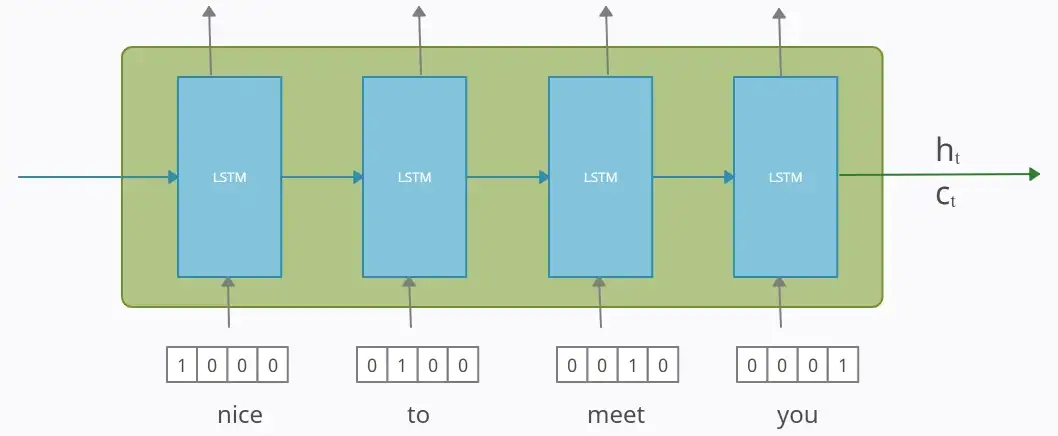

### The Decoder in Training Phase: Teacher Forcing

To train our decoder model, we use a technique called “Teacher Forcing” in which we feed the true output/token (and not the predicted output/token) from the previous time-step as input to the current time-step.

To explain, let’s look at the 1st iteration of training. Here, we have fed our input-sequence to the encoder, which processes it and passes its final internal states to the decoder. Now for the decoder part, refer to the diagram below.

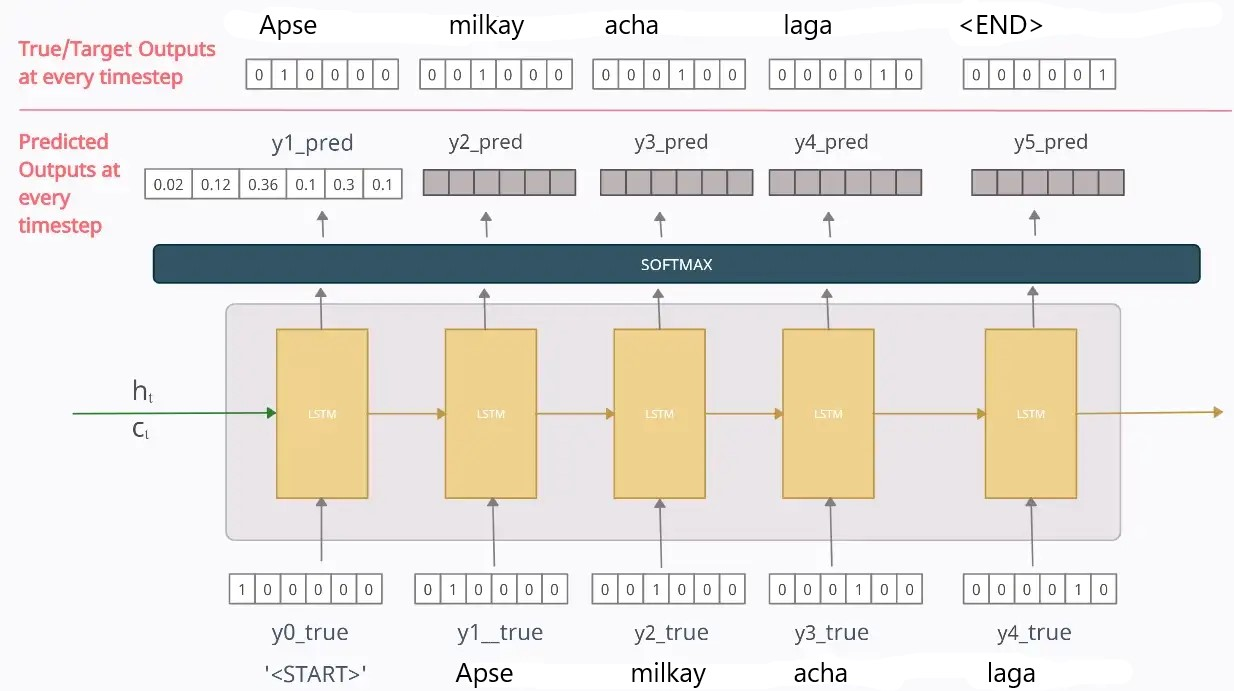

At time-step 1

The vector [1 0 0 0 0 0] for the word ‘<START>’ is fed as the input vector. Now here I want my model to predict the output as y1_true=[0 1 0 0 0 0] but since my model has just started training, it will output something random. Let the predicted value at time-step 1 be y1_pred=[0.02 0.12 0.36 0.1 0.3 0.1] meaning it predicts the 1st token to be ‘milkay’. Now, should we use this y1_pred as the input at time-step 2?. We can do that, but in practice, it was seen that this leads to problems like slow convergence, model instability, and poor skill which is quite logical if you think.

Thus, teacher forcing was introduced to rectify this. in which we feed the true output/token (and not the predicted output) from the previous time-step as input to the current time-step. That means the input to the time-step 2 will be y1_true=[0 1 0 0 0 0] and not y1_pred.

Finally, the loss is calculated on the predicted outputs from each time-step and the errors are backpropagated through time to update the parameters of the model. The loss function used is the categorical cross-entropy loss function between the target-sequence/Y_true and the predicted-sequence/Y_pred such that

### The Decoder in Test Phase

In a real-world application, we won't have Y_true but only X. Thus we can’t use what we did in the training phase as we don’t have the target-sequence/Y_true. Thus when we are testing our model, the predicted output (and not the true output unlike the training phase) from the previous time-step is fed as input to the current time-step. Rest is all same as the training phase.

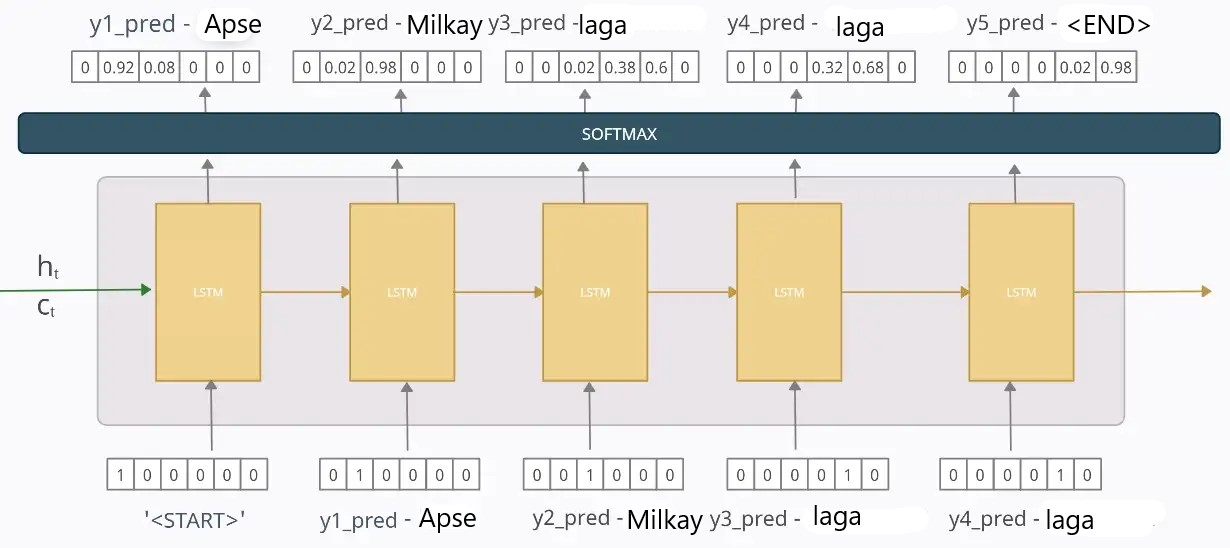

So according to our trained model, the predicted-sequence at test time is “Apse milkay laga laga”. Hence though the model was incorrect on the 3rd prediction, we still fed it as input to the next time-step. The correctness of the model depends on the amount of data available and how well it has been trained. The model may predict a wrong output but nevertheless, the same output is only fed to the next time-step in the test phase.